In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df.head()

,gender,age,marital_status,job_position,credit_sum,credit_length,scoring,education,tariff_id,region,average_region_wage,income,credit_count,overdue_count,churn
0,Female,48,3.0,15,59998.00,10,0.770249,2.0,28,23.0,25850.0,30000.0,1.0,1.0,0
1,Male,28,NaN,15,10889.00,6,0.248514,2.0,2,30.0,66880.0,43000.0,2.0,0.0,0
2,Female,32,3.0,14,10728.00,12,0.459589,4.0,2,64.0,23430.0,23000.0,5.0,0.0,0
3,Male,27,2.0,14,12009.09,12,0.362536,2.0,2,8.0,23650.0,17000.0,2.0,0.0,0
4,Female,45,3.0,14,16908.89,10,0.421385,4.0,2,77.0,26620.0,NaN,1.0,0.0,0


### Initial Data Exploration

In [4]:
df.shape

(170744, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170744 entries, 0 to 170743
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               170744 non-null  object 
 1   age                  170744 non-null  int64  
 2   marital_status       170739 non-null  float64
 3   job_position         170744 non-null  int64  
 4   credit_sum           170743 non-null  float64
 5   credit_length        170744 non-null  int64  
 6   scoring              170741 non-null  float64
 7   education            170741 non-null  float64
 8   tariff_id            170744 non-null  int64  
 9   region               170552 non-null  float64
 10  average_region_wage  170552 non-null  float64
 11  income               170742 non-null  float64
 12  credit_count         161514 non-null  float64
 13  overdue_count        161514 non-null  float64
 14  churn                170744 non-null  int64  
dtypes: float64(9), in

In [6]:
df.nunique()

gender                     2
age                       54
marital_status             5
job_position              18
credit_sum             42769
credit_length             31
scoring                16280
education                  5
tariff_id                 33
region                    81
average_region_wage       64
income                  1591
credit_count              21
overdue_count              4
churn                      2
dtype: int64

In [7]:
df.describe()

,age,marital_status,job_position,credit_sum,credit_length,scoring,education,tariff_id,region,average_region_wage,income,credit_count,overdue_count,churn
count,170744.000000,170739.000000,170744.000000,170743.000000,170744.000000,170741.000000,170741.000000,170744.000000,170552.000000,170552.000000,170742.000000,161514.000000,161514.000000,170744.000000
mean,36.497312,3.197588,13.160006,26095.270158,10.980784,0.469472,3.202705,14.118839,43.010085,32957.772058,40138.484058,2.107303,0.046070,0.176030
std,10.546067,0.738574,3.132438,16234.846480,3.536697,0.124268,1.064028,11.546768,22.219876,12577.506049,25044.376923,1.777138,0.211549,0.380846
min,18.000000,1.000000,1.000000,2736.000000,3.000000,0.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,14.000000,14908.000000,10.000000,0.379495,2.000000,2.000000,25.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,34.000000,3.000000,14.000000,21229.000000,10.000000,0.461599,4.000000,19.000000,40.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
75%,43.000000,4.000000,14.000000,32068.000000,12.000000,0.552427,4.000000,28.000000,63.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000
max,71.000000,5.000000,18.000000,200000.000000,36.000000,1.128291,5.000000,33.000000,82.000000,66880.000000,950000.000000,21.000000,3.000000,1.000000


In [8]:
df['gender'].value_counts()

gender
Male      88697
Female    82047
Name: count, dtype: int64

In [9]:
df['churn'].value_counts()

churn
0    140688
1     30056
Name: count, dtype: int64

In [10]:
df['marital_status'].value_counts()

marital_status
3.0    93950
4.0    52148
2.0    16970
1.0     4196
5.0     3475
Name: count, dtype: int64

In [12]:
df['education'].value_counts()

education
4.0    87535
2.0    72593
5.0     9941
3.0      565
1.0      107
Name: count, dtype: int64

In [13]:
df['overdue_count'].value_counts()

overdue_count
0.0    154133
1.0      7326
2.0        50
3.0         5
Name: count, dtype: int64

### Check for missing Values

In [14]:
df.isnull().sum()

gender                    0
age                       0
marital_status            5
job_position              0
credit_sum                1
credit_length             0
scoring                   3
education                 3
tariff_id                 0
region                  192
average_region_wage     192
income                    2
credit_count           9230
overdue_count          9230
churn                     0
dtype: int64

### Univariate Analysis

### Categorical

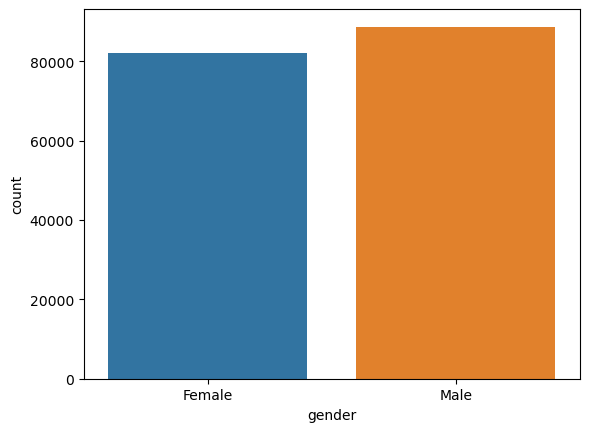

In [18]:
sns.countplot(x='gender', data=df)
plt.show()

<Axes: xlabel='education', ylabel='count'>

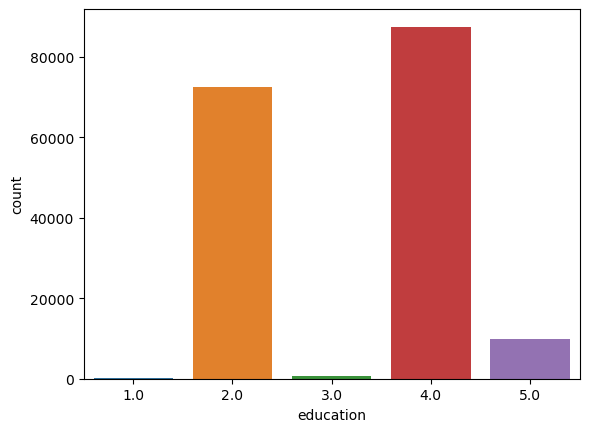

In [19]:
sns.countplot(x='education', data=df)

<Axes: xlabel='marital_status', ylabel='count'>

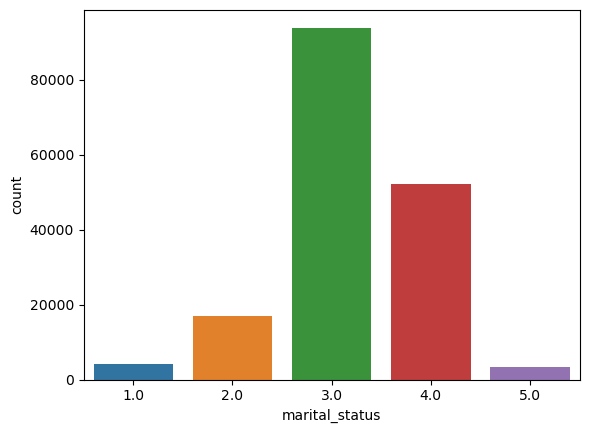

In [20]:
sns.countplot(x='marital_status', data=df)

<Axes: xlabel='churn', ylabel='count'>

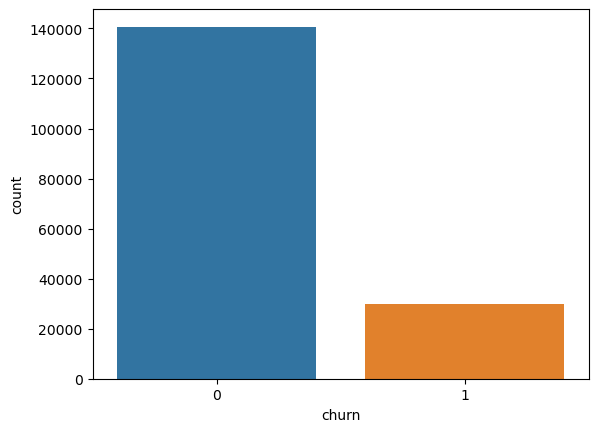

In [21]:
sns.countplot(x='churn', data=df)

<Axes: xlabel='overdue_count', ylabel='count'>

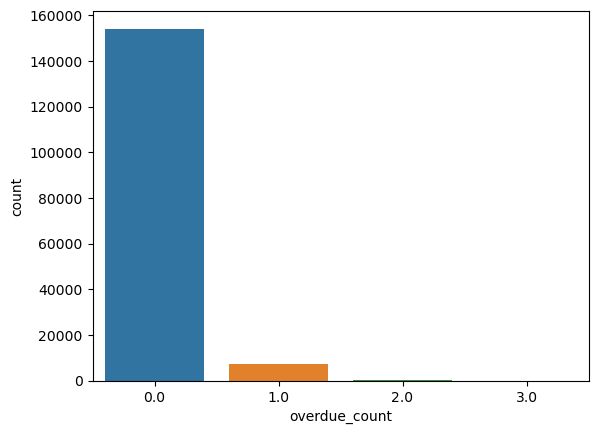

In [22]:
sns.countplot(x='overdue_count', data=df)

### Numerical

(array([11776., 33082., 34833., 32324., 21761., 14323., 11853.,  6199.,
         3271.,  1322.]),
 array([18. , 23.3, 28.6, 33.9, 39.2, 44.5, 49.8, 55.1, 60.4, 65.7, 71. ]),
 <BarContainer object of 10 artists>)

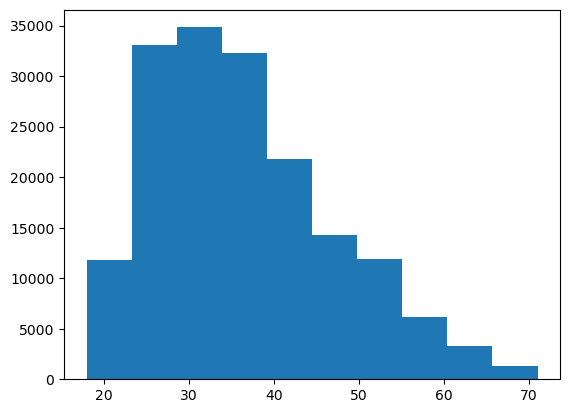

In [24]:
plt.hist(df['age'])

In [30]:
numerical_cols = df.select_dtypes(include=['int', 'float'])

In [31]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

age                        Axes(0.125,0.77;0.227941x0.11)
marital_status          Axes(0.398529,0.77;0.227941x0.11)
job_position            Axes(0.672059,0.77;0.227941x0.11)
credit_sum                Axes(0.125,0.638;0.227941x0.11)
credit_length          Axes(0.398529,0.638;0.227941x0.11)
scoring                Axes(0.672059,0.638;0.227941x0.11)
education                 Axes(0.125,0.506;0.227941x0.11)
tariff_id              Axes(0.398529,0.506;0.227941x0.11)
region                 Axes(0.672059,0.506;0.227941x0.11)
average_region_wage       Axes(0.125,0.374;0.227941x0.11)
income                 Axes(0.398529,0.374;0.227941x0.11)
credit_count           Axes(0.672059,0.374;0.227941x0.11)
overdue_count             Axes(0.125,0.242;0.227941x0.11)
churn                  Axes(0.398529,0.242;0.227941x0.11)
dtype: object

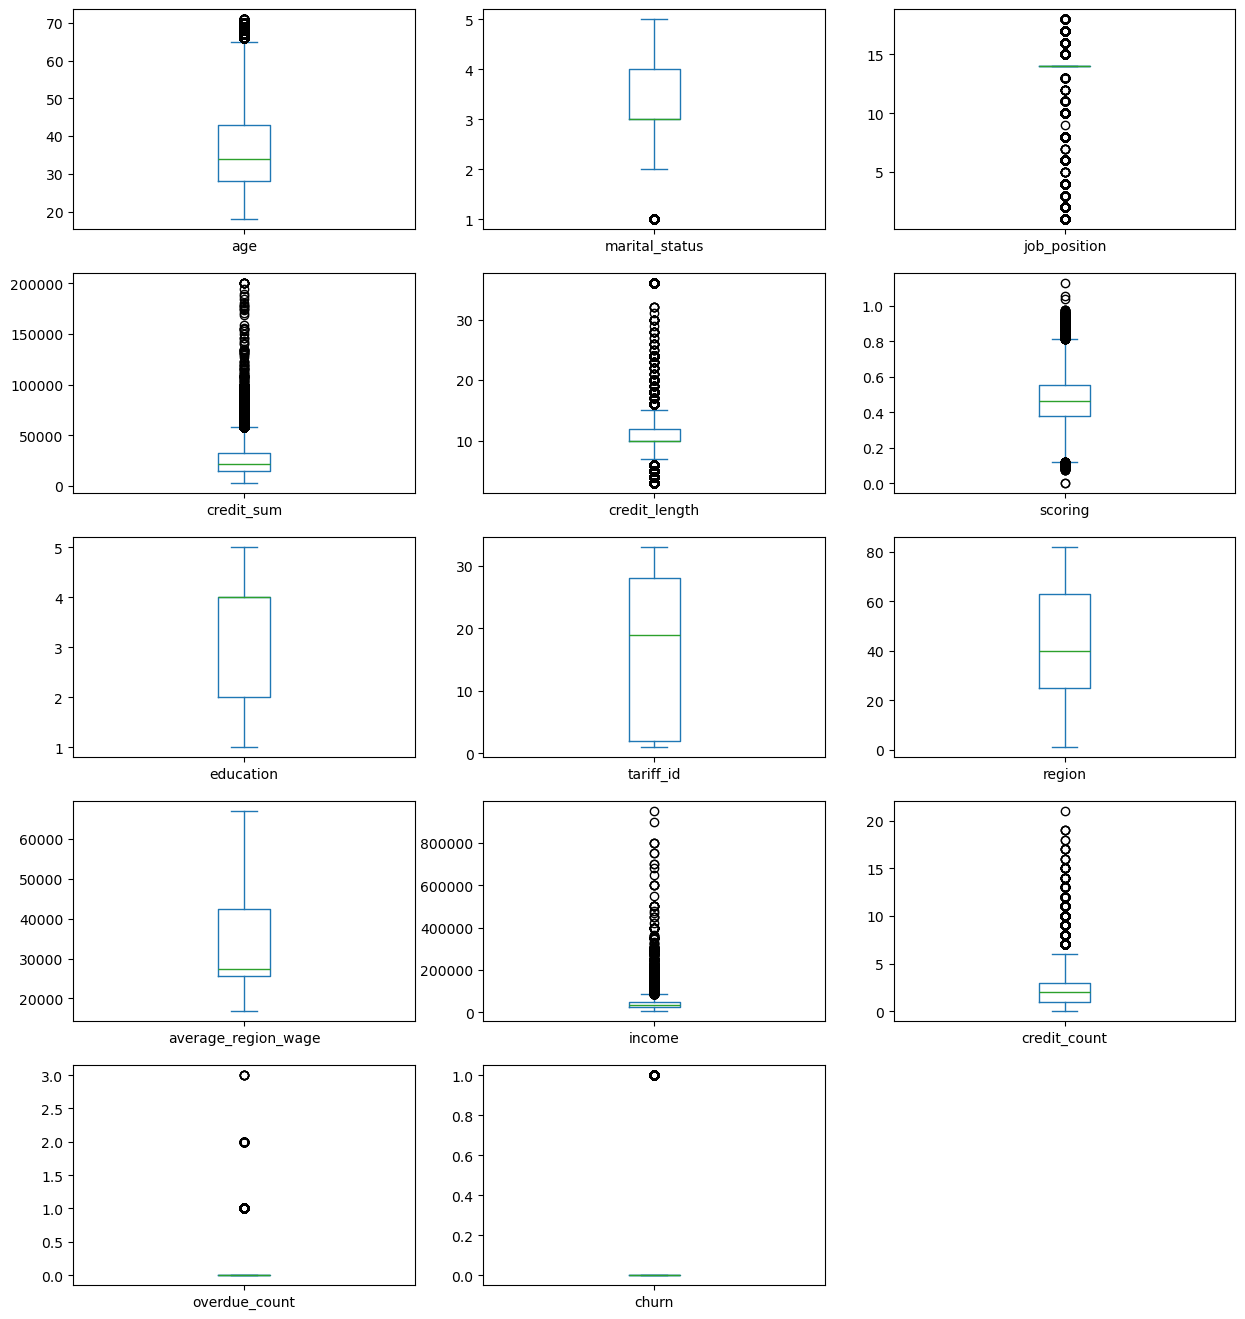

In [43]:
numerical_cols.plot(kind='box', layout= (6,3), subplots=True,  figsize=(15,20))